# Proyek Analisis Data: Bike Share Analyze
- **Nama:** Yanuar Putra Kharisma Adhiyasa
- **Email:** m006d4ky1492@bangkit.academy
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Hari apa yang paling diminati untuk casual users dalam seminggu/weekdays?
- Hari apa yang paling diminati untuk register users dalam seminggu/weekdays?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

Load dataset

In [ ]:
day_data = pd.read_csv('./data/day.csv')
day_data.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [ ]:
hour_data = pd.read_csv('./data/hour.csv')
hour_data.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Assessing Data

check missing value day_data

In [ ]:
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

check missing value hour_data

In [ ]:
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Check outliers using box plot for day_data dataset

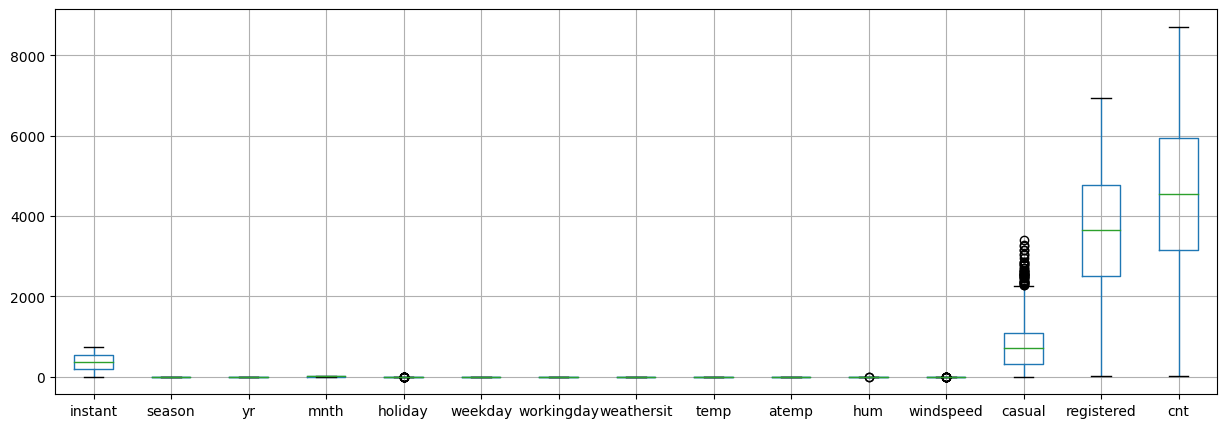

In [ ]:
plt.figure(figsize=(15, 5))
day_data.boxplot()
plt.show()

insight : seperti yang dapat dilihat, terdapat beberapa kolom yang mengandung outlier berdasarkan visualisasi box plot. Oleh karena itu, kita perlu membersihkan data dengan cara menghapus outlier tersebut.

### Cleaning Data

Function untuk menghilangkan outlier

In [ ]:
def drop_outliers(df):
    # Filter out only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Calculate the IQR for each numeric column
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers for each numeric column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Drop the rows containing outliers for all numeric columns
    df_clean = df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]
    return df_clean

print(f"Shape day_data sebelum menghapus outlier: {day_data.shape}")
day_data = drop_outliers(day_data)
print(f"Shape day_data setelah menghapus outlier: {day_data.shape}")

print(f"Shape hour_data sebelum menghapus outlier: {hour_data.shape}")
hour_data = drop_outliers(hour_data)
print(f"Shape hour_data setelah menghapus outlier: {hour_data.shape}")

Shape day_data sebelum menghapus outlier: (731, 16)
Shape day_data setelah menghapus outlier: (655, 16)
Shape hour_data sebelum menghapus outlier: (17379, 17)
Shape hour_data setelah menghapus outlier: (14799, 17)


## Exploratory Data Analysis (EDA)

### Explore ...

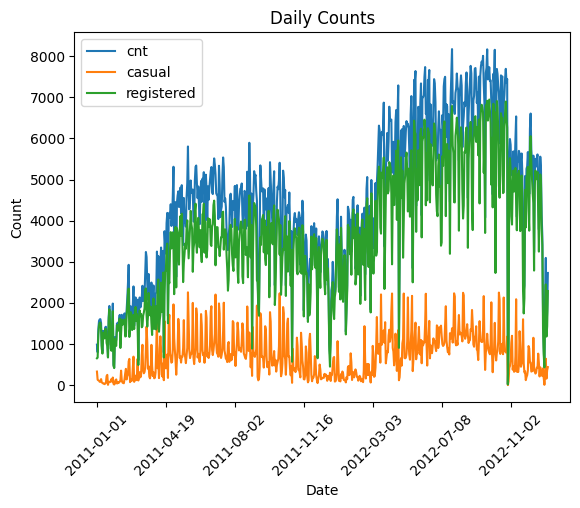

In [ ]:
day_data.plot(x='dteday', y=['cnt', 'casual', 'registered'], kind='line')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Daily Counts')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

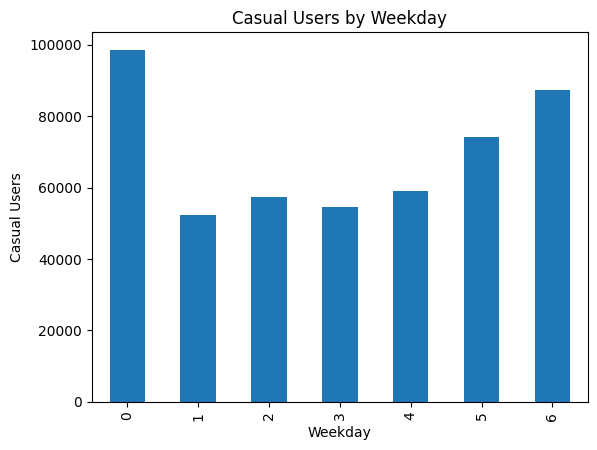

In [ ]:
weekday_grouped_day = day_data.groupby('weekday')
casual_users_by_day = weekday_grouped_day['casual'].sum()

casual_users_by_day.plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Casual Users')
plt.title('Casual Users by Weekday')
plt.show()

Seperti yang bisa Anda lihat dari visualisasi di atas, hari paling populer bagi pengguna kasual adalah Minggu (0). Ini menarik karena berarti pengguna kasual lebih sering menyewa sepeda pada hari Minggu.

### Pertanyaan 2:

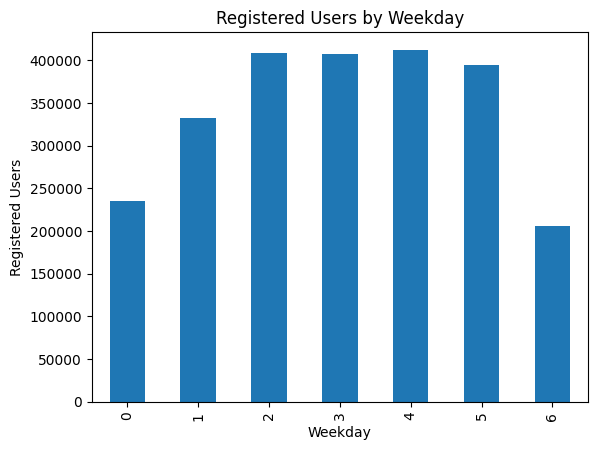

In [ ]:
registered_users_by_day = weekday_grouped_day['registered'].sum()

registered_users_by_day.plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Registered Users')
plt.title('Registered Users by Weekday')
plt.show()

Seperti yang bisa Anda lihat dari visualisasi di atas, hari paling populer bagi pengguna terdaftar adalah Kamis (4). Ini menarik karena berarti pengguna terdaftar lebih sering menyewa sepeda pada hari Kamis.

## Conclusion

- Hari yang paling diminati untuk casual user adalah hari Sunday(0)/Minggu
- Hari yang paling diminati untuk casual user adalah hari Thursday(4)/Kamis